# DL-Workshop: Lesson 1

### By: Kyoung-Sun Lee

This code uses deep learning to distinguish the images of ***star clusteres*** and ***nebulae***.   

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [32]:
# Import packages
from fastai.vision import *
from fastai.metrics import error_rate
from IPython.display import Image

In [35]:
#set a data path for image
data_path = '/notebooks/course-v3/nbs/dl1/data/cluster_nebula/'
print(data_path)
#data_path.ls()   #not showing the directory???

bs=4
size=224

data=ImageDataBunch.from_folder(data_path, train='train', bs=bs, valid='valid', size=size)

/notebooks/course-v3/nbs/dl1/data/cluster_nebula/


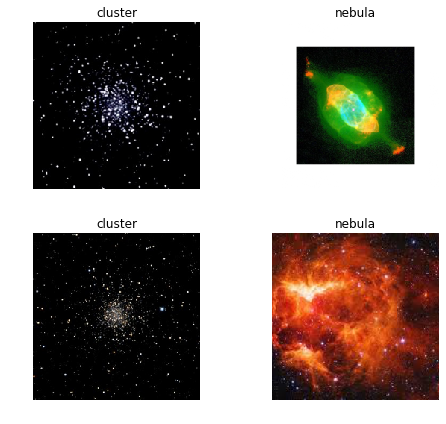

In [12]:
data.show_batch(rows=3, figsize=(7, 6))

In [13]:
# Setup the learner - Resnet34
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [14]:
# Find the approparite learning rate
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


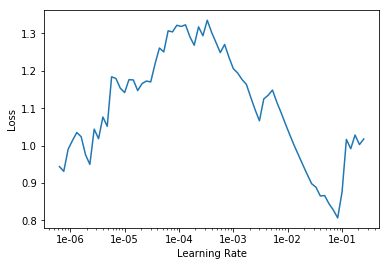

In [15]:
# plot the learning rates
learn.recorder.plot()

In [20]:
# Run the fit
learn.fit_one_cycle(5, max_lr=1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.813798,5.220294,0.590909,00:01
1,2.521862,1.350168,0.681818,00:01
2,2.527921,0.685702,0.772727,00:01
3,2.125866,0.440082,0.818182,00:01
4,2.040467,0.503598,0.818182,00:01


In [36]:
# check the result 
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs=interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

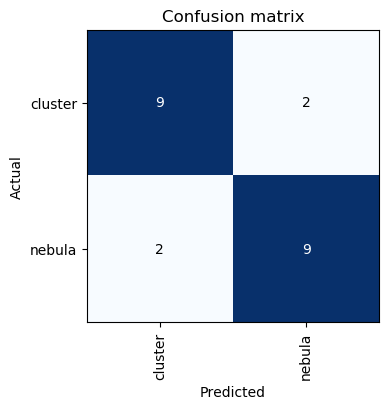

In [22]:
# confusion matrix
interp.plot_confusion_matrix(figsize=(4,4), dpi=100)

In [29]:
# Find out which files had incorrect predictions
losses,idxs = interp.top_losses(4)
for p in data.valid_ds.x.items[idxs]:
    print(p)

/notebooks/course-v3/nbs/dl1/data/cluster_nebula/valid/cluster/caldwell-C89_cluster.jpg
/notebooks/course-v3/nbs/dl1/data/cluster_nebula/valid/cluster/caldwell-C13_cluster.jpg
/notebooks/course-v3/nbs/dl1/data/cluster_nebula/valid/nebula/keyhole_nebula30.jpg
/notebooks/course-v3/nbs/dl1/data/cluster_nebula/valid/nebula/helmet_nebular.jpeg


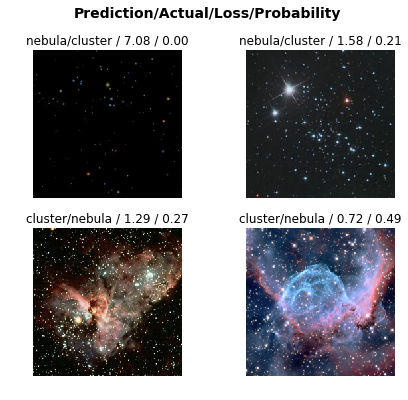

In [37]:
# Those are the images that were incorrectly classified.
interp.plot_top_losses(4, figsize=(7, 6))